<a href="https://colab.research.google.com/github/kulendu/DeepLearning_practice/blob/master/Breast_cancer_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# **Loading the Dataset**

In [2]:
data = pd.read_csv('cancer_classification.csv')

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.describe

<bound method NDFrame.describe of      mean radius  mean texture  ...  worst fractal dimension  benign_0__mal_1
0          17.99         10.38  ...                  0.11890                0
1          20.57         17.77  ...                  0.08902                0
2          19.69         21.25  ...                  0.08758                0
3          11.42         20.38  ...                  0.17300                0
4          20.29         14.34  ...                  0.07678                0
..           ...           ...  ...                      ...              ...
564        21.56         22.39  ...                  0.07115                0
565        20.13         28.25  ...                  0.06637                0
566        16.60         28.08  ...                  0.07820                0
567        20.60         29.33  ...                  0.12400                0
568         7.76         24.54  ...                  0.07039                1

[569 rows x 31 columns]>

In [5]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

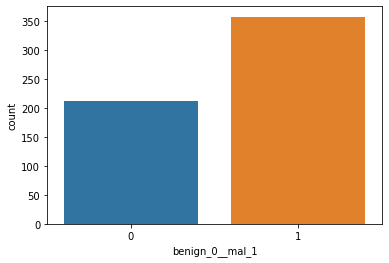

In [6]:
sns.countplot(x='benign_0__mal_1', data=data)

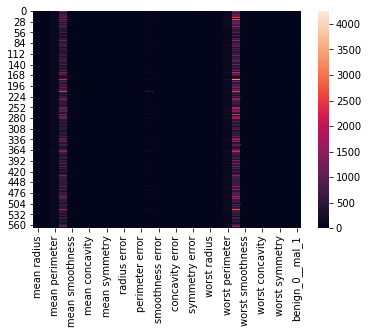

In [7]:
sns.heatmap(data=data)

In [8]:
data.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

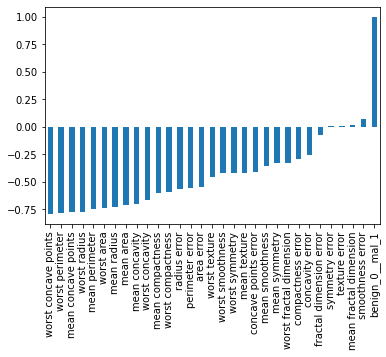

In [9]:
data.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

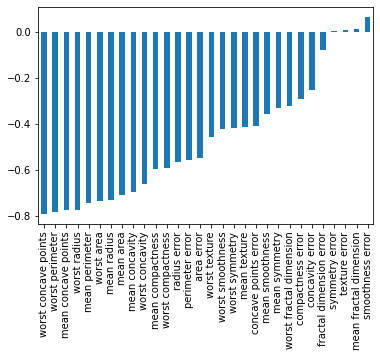

In [10]:
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# **Splitting into Training and Testing  data**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('benign_0__mal_1',axis=1).values
y = data['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# **Scaling the data**

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scalar = MinMaxScaler()

In [17]:
scalar.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [19]:
X_test.shape

(143, 30)

# **Model & training**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6947 - accuracy: 0.6197 - val_loss: 0.6821 - val_accuracy: 0.6154
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6315 - val_loss: 0.6606 - val_accuracy: 0.6154
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6338 - val_loss: 0.6390 - val_accuracy: 0.6154
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6549 - val_loss: 0.6131 - val_accuracy: 0.6713
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5939 - accuracy: 0.7394 - val_loss: 0.5837 - val_accuracy: 0.8042
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.8169 - val_loss: 0.5482 - val_accuracy: 0.8392
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.8498 - val_loss: 0.5078 - val_accuracy: 0.8531
Epoch 8/600


# **Tuning**

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.694701,0.619718,0.682078,0.615385
1,0.668304,0.631455,0.660598,0.615385
2,0.645832,0.633803,0.638955,0.615385
3,0.621521,0.654930,0.613066,0.671329
4,0.593874,0.739437,0.583726,0.804196
...,...,...,...,...
595,0.002567,1.000000,0.308963,0.937063
596,0.002392,1.000000,0.289636,0.937063
597,0.003068,1.000000,0.320839,0.944056
598,0.003335,1.000000,0.294239,0.930070


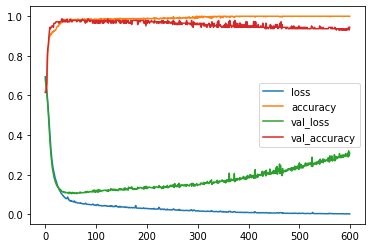

In [ ]:
losses.plot()

In [27]:
'''
Since this is a overfitted model, we need to make this a perfectly fitted model. We will be using 'EARLY STOPPING' to tume this model.
'''

"\nSince this is a overfitted model, we need to make this a perfectly fitted model. We will be using 'EARLY STOPPING' to tume this model.\n"

# 'Early Stopping' to prevent **overfitting**

In [28]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify as an improvement, i.e. an absolute
 |        change of less than min_delta, will count as no
 |        improvem

In [31]:
early_stop =  EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min')

In [32]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6693 - accuracy: 0.8028 - val_loss: 0.6495 - val_accuracy: 0.8811
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.8826 - val_loss: 0.6147 - val_accuracy: 0.9161
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.8732 - val_loss: 0.5745 - val_accuracy: 0.9021
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8897 - val_loss: 0.5250 - val_accuracy: 0.9371
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.9061 - val_loss: 0.4754 - val_accuracy: 0.9580
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.9061 - val_loss: 0.4276 - val_accuracy: 0.9510
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.9108 - val_loss: 0.3837 - val_accuracy: 0.9580
Epoch 8/600


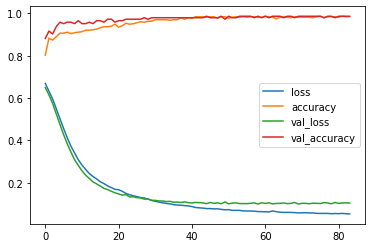

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# **Now to more tune, or perfectly fit the mdoel we will use the Dropout layers**

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.7003 - accuracy: 0.6268 - val_loss: 0.6641 - val_accuracy: 0.6224
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6455 - val_loss: 0.6312 - val_accuracy: 0.6923
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6549 - val_loss: 0.6062 - val_accuracy: 0.7692
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.6948 - val_loss: 0.5842 - val_accuracy: 0.7832
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.7113 - val_loss: 0.5530 - val_accuracy: 0.8112
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7113 - val_loss: 0.5222 - val_accuracy: 0.8392
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7277 - val_loss: 0.4961 - val_accuracy: 0.8951
Epoch 8/600


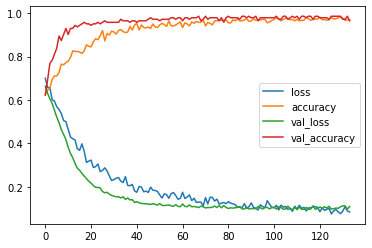

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# **Predictions**

In [40]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [43]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]
